In [45]:
%matplotlib inline
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import arviz as az
import theano
import ODE_models
import pandas as pd
import scipy.integrate as integrate
from scipy.integrate import quad
plt.style.use('seaborn-darkgrid')

The New York Data came from:
https://www1.nyc.gov/site/doh/covid/covid-19-data.page

In [46]:

r_newyorkTSV = '../../newyork.tsv'
w_newyorkTSV = '../../newyork.tsv'
tsv_readny = pd.read_csv("newyork.tsv", sep='\t')
cumulativeny = tsv_readny['confirmed'] #is this what I want?

In [47]:
recovery_days = 7 # average length of infection (current baseline from 2012)
gamma = 1/recovery_days # rate of recovery

beta_S = 0.31 # infection rate for symptomatic infectives
beta_A = 0.37 # infection rate for asymptomatic infectives

q = .80209   # reduction factor for those with altered/adjusted behavior
p = 2/3   # probability of developing symptoms

   # average length of memory regarding active cases
nu  = 1/7  # rate of forgetting past "new case" counts

M_thresh = 0.01 # risk threshold 
m = 1/M_thresh

rho = 10 # speed of behavioral changes (1/days)

mu = 10**(-8)  # irrational exploration with fixed units


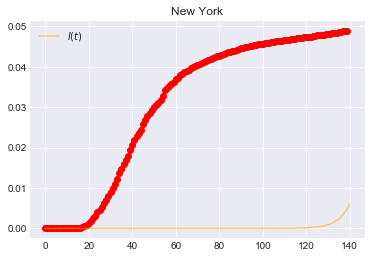

In [48]:
params = ODE_models.get_params(gamma,beta_S, beta_A, q, p, nu, m, rho, mu)
## Set initial conditions
Nny= 8.399e6
Sn_0ny  = 1-(0.005+yobsny[1]/Nny)
Sa_0  = 0.005
IS_0ny  = yobsny[1]/Nny
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01

#newyork
initial_stateny = np.array([Sn_0ny,Sa_0,IS_0ny,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
timeny = np.arange(0,140,.001)
timeobsny = np.arange(0,140,1)
sim_systemny = odeint(ODE_models.SIRan_system, initial_stateny, timeny, args=(params,))



yny =1-(sim_systemny[:,0]+sim_systemny[:,1])
yobsny = cumulativeny/Nny



plt.plot(timeobsny,yobsny, color= 'red',marker='o', linestyle='none')
plt.plot(timeny, yny, color='orange', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.title('New York')
plt.show()



error: Extra arguments must be in a tuple

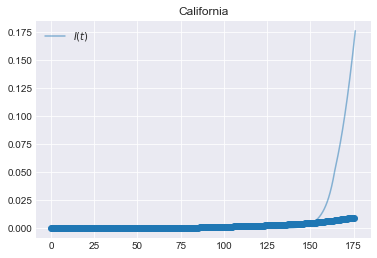

In [30]:
#California

r_californiaTSV = '../../california.tsv'
w_californiaTSV = '../../california.tsv'
tsv_read = pd.read_csv("california.tsv", sep='\t')
cumulativeca = tsv_read['confirmed'] #is this what I want?
california_pop = 39.51e6
Nca = california_pop
Sn_0  = 1-(Sa_0+yobsca[1]/Nca)
Sa_0  = 0.005
IS_0  = yobsca[1]/Nca
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01
# Simulate the ODE
initial_state = np.array([Sn_0,Sa_0,IS_0,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])
time = np.arange(0,176,.001)
timeobs = np.arange(0,176,1)
sim_system = odeint(ODE_models.SIRan_system, initial_state, time, args=(params,))

y =1-(sim_system[:,0]+sim_system[:,1]) #take the integral of this from start to current time
    
yobsca = cumulativeca/Nca
plt.plot(timeobs,yobsca, marker='o', linestyle='none')
plt.plot(time, y, color='C0', alpha=0.5, label=f'$I(t)$')
plt.legend()
plt.title('California Cumulative')
plt.show()


array([1.22124533e-15, 1.33226763e-15, 1.33226763e-15, ...,
       1.75991303e-01, 1.76005692e-01, 1.76020081e-01])